In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para los gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# --- Paso 5.1: Carga del Dataset Preprocesado ---
print("--- Cargando el dataset preprocesado ---")
try:
    df = pd.read_parquet('training_data.parquet')
    print("Dataset 'training_data.parquet' cargado exitosamente.")
    print(f"Dimensiones: {df.shape}")
except FileNotFoundError:
    print("Error: El archivo 'training_data.parquet' no fue encontrado.")
    print("Asegúrate de que el archivo está en el mismo directorio.")
    exit()


--- Cargando el dataset preprocesado ---
Dataset 'training_data.parquet' cargado exitosamente.
Dimensiones: (3361236, 18)


In [2]:
# --- Paso 5.2: Análisis Descriptivo Numérico ---
# Esto nos da un resumen estadístico de las columnas numéricas.
# Es útil para verificar rangos (ej. que la edad no sea negativa) y distribuciones.
print("\n--- Resumen Estadístico de Variables Numéricas ---")
print(df.describe())



--- Resumen Estadístico de Variables Numéricas ---
             target           age  avg_price_paid  total_articles_bought  \
count  3.361236e+06  3.361236e+06    3.361236e+06           3.361236e+06   
mean   3.333333e-01  2.492589e+01    2.805816e-02           1.587959e+02   
std    4.714046e-01  2.707485e+00    6.638110e-03           1.380271e+02   
min    0.000000e+00  1.600000e+01    3.989214e-03           1.000000e+00   
25%    0.000000e+00  2.300000e+01    2.356678e-02           6.700000e+01   
50%    0.000000e+00  2.500000e+01    2.744216e-02           1.190000e+02   
75%    1.000000e+00  2.700000e+01    3.188914e-02           2.090000e+02   
max    1.000000e+00  2.900000e+01    1.126949e-01           1.441000e+03   

       times_purchased  
count     3.361236e+06  
mean      4.160469e+01  
std       1.025049e+02  
min       0.000000e+00  
25%       0.000000e+00  
50%       8.000000e+00  
75%       4.100000e+01  
max       1.962000e+03  



Generando gráfico: Distribución de la Edad...


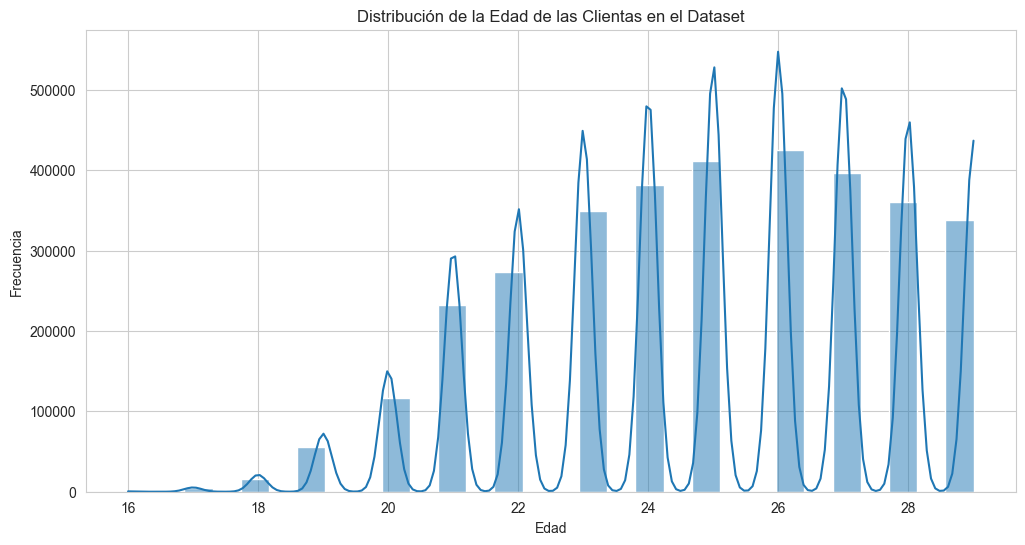

In [3]:
# --- Paso 5.3: Visualizaciones Clave ---

# 1. Distribución de la Edad de las Clientas
print("\nGenerando gráfico: Distribución de la Edad...")
plt.figure()
sns.histplot(data=df, x='age', bins=30, kde=True)
plt.title('Distribución de la Edad de las Clientas en el Dataset')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()
# Por qué?: Para entender el rango de edad principal de nuestro segmento de "mujeres jóvenes".


Generando gráfico: Top 10 Tipos de Productos Favoritos...


C:\Users\crist\AppData\Local\Temp\ipykernel_25968\413610602.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_fav_products.index, y=top_10_fav_products.values, palette='viridis')


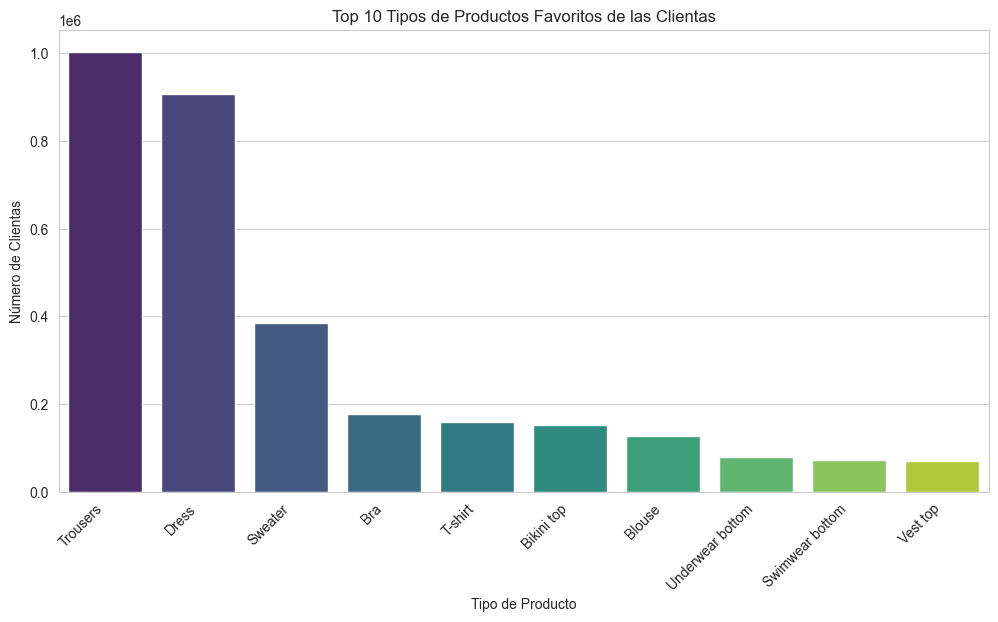

In [4]:
# 2. Top 10 Tipos de Productos Favoritos
print("\nGenerando gráfico: Top 10 Tipos de Productos Favoritos...")
plt.figure()
# Usamos value_counts() para contar, y nlargest() para quedarnos con los 10 primeros.
top_10_fav_products = df['fav_product_type'].value_counts().nlargest(10)
sns.barplot(x=top_10_fav_products.index, y=top_10_fav_products.values, palette='viridis')
plt.title('Top 10 Tipos de Productos Favoritos de las Clientas')
plt.xlabel('Tipo de Producto')
plt.ylabel('Número de Clientas')
plt.xticks(rotation=45, ha='right') # Rotamos las etiquetas para que no se solapen
plt.show()
# Por qué?: Para entender qué categorías de gusto dominan en nuestro dataset.

 ¿Los productos que se compran (target=1) tienden a ser más caros o baratos que los que no se compran (target=0)?

 haciendo esto se podría  ver si el poder adquisitivo del usuario (capturado en su perfil) influye en la decisión de compra de un artículo candidato.


Generando gráfico: Precio Promedio vs. Target...


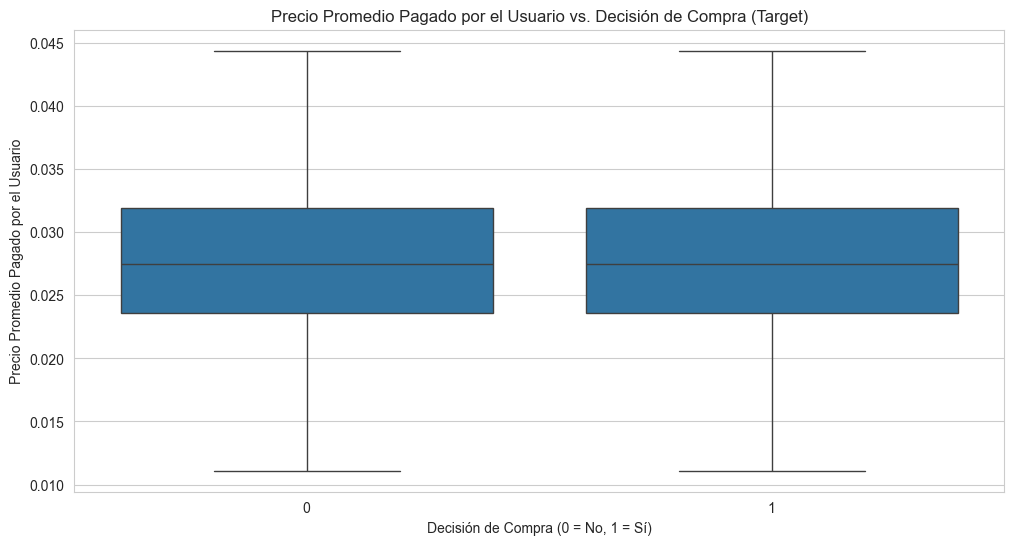

In [ ]:
# 3. Relación entre el Precio Promedio Pagado y la Compra
print("\nGenerando gráfico: Precio Promedio vs. Target...")
plt.figure()
# Usamos un boxplot para comparar las distribuciones. El argumento 'showfliers=False' oculta los outliers para una mejor visualización.
sns.boxplot(data=df, x='target', y='avg_price_paid', showfliers=False)
plt.title('Precio Promedio Pagado por el Usuario vs. Decisión de Compra (Target)')
plt.xlabel('Decisión de Compra (0 = No, 1 = Sí)')
plt.ylabel('Precio Promedio Pagado por el Usuario')
plt.show()



Generando gráfico: Popularidad del Artículo vs. Target...


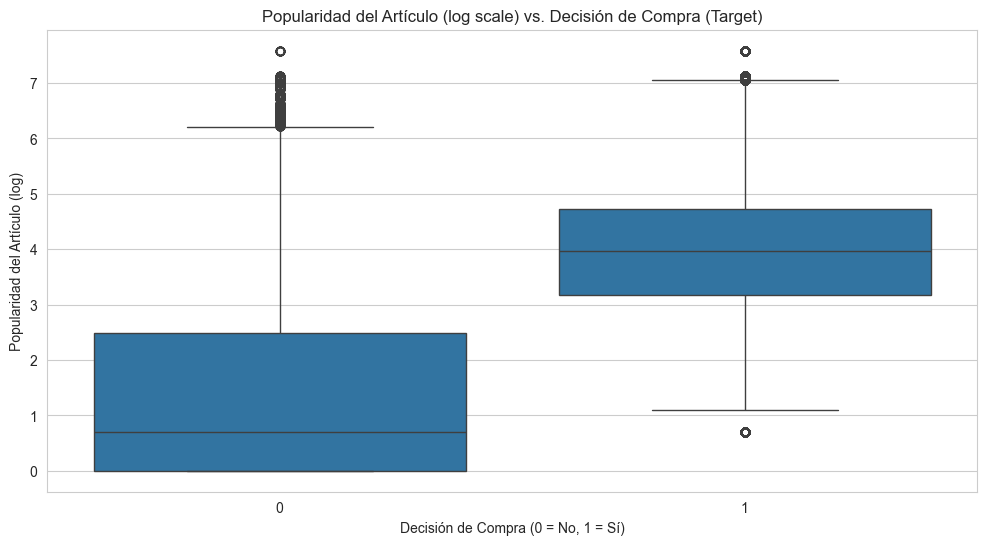

In [7]:
import numpy as np
# Código para el nuevo análisis
print("\nGenerando gráfico: Popularidad del Artículo vs. Target...")
plt.figure()
# Usamos un boxplot de nuevo, con log_scale para manejar la gran dispersión de la popularidad.
# El +1 es para evitar errores con log(0) si un artículo tiene 0 compras.
df['log_times_purchased'] = np.log(df['times_purchased'] + 1)
sns.boxplot(data=df, x='target', y='log_times_purchased')
plt.title('Popularidad del Artículo (log scale) vs. Decisión de Compra (Target)')
plt.xlabel('Decisión de Compra (0 = No, 1 = Sí)')
plt.ylabel('Popularidad del Artículo (log)')
plt.show()

# Limpieza
df.drop(columns=['log_times_purchased'], inplace=True)


Generando Heatmap de Correlación...


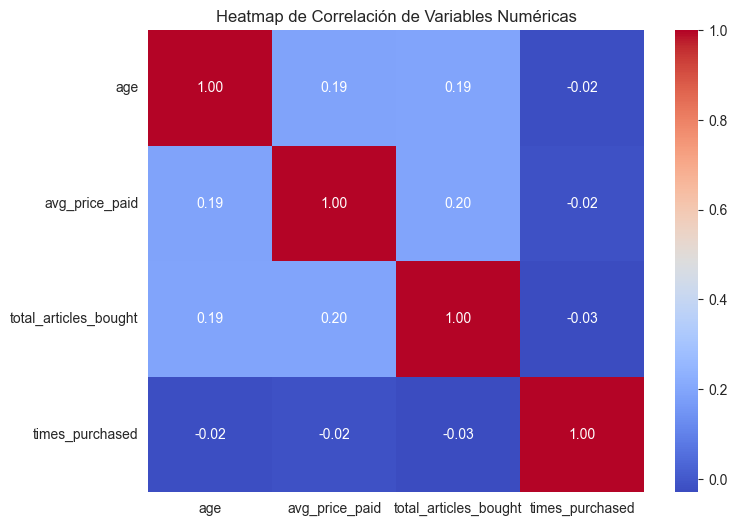

In [8]:
# Código para el nuevo análisis
print("\nGenerando Heatmap de Correlación...")
# Seleccionamos solo las columnas numéricas originales que creamos
numeric_cols = ['age', 'avg_price_paid', 'total_articles_bought', 'times_purchased']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlación de Variables Numéricas')
plt.show()

 ¿Cómo varían los "gustos" con la edad?
¿Las clientas más jóvenes tienen preferencias de color o tipo de producto diferentes a las de más edad (dentro de nuestro segmento)?


--- Análisis de Gustos vs. Edad ---


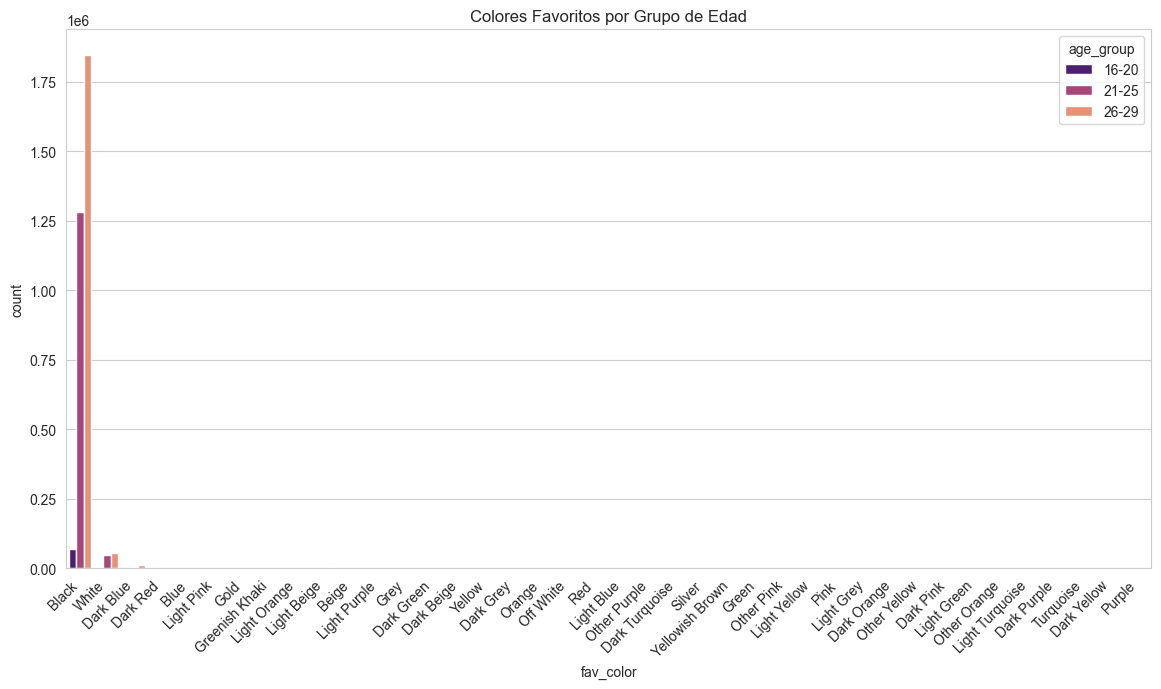

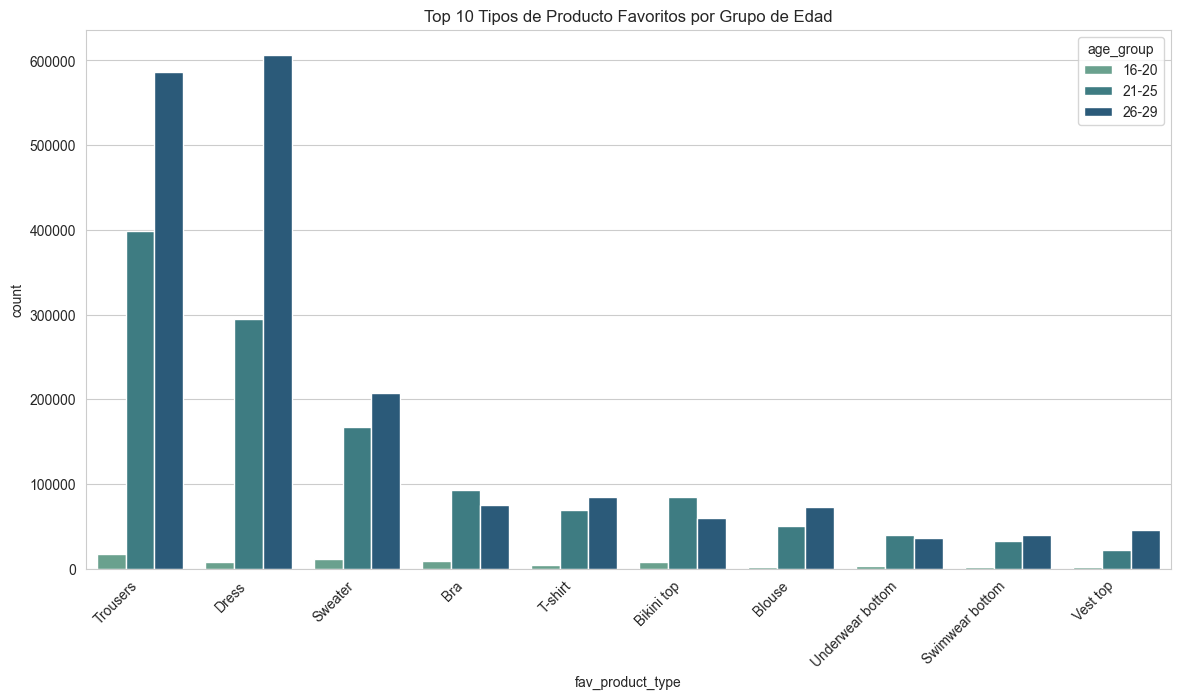

In [9]:
# --- Análisis de Gustos vs. Edad ---
print("\n--- Análisis de Gustos vs. Edad ---")

# Creamos "grupos de edad" para una comparación más clara
bins = [15, 20, 25, 30]
labels = ['16-20', '21-25', '26-29']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# 1. Colores Favoritos por Grupo de Edad
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='fav_color', hue='age_group', palette='magma')
plt.title('Colores Favoritos por Grupo de Edad')
plt.xticks(rotation=45, ha='right')
plt.show()

# 2. Tipos de Producto Favoritos por Grupo de Edad
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='fav_product_type', hue='age_group', palette='crest',
              order=df['fav_product_type'].value_counts().nlargest(10).index) # Ordenamos por el top 10 general
plt.title('Top 10 Tipos de Producto Favoritos por Grupo de Edad')
plt.xticks(rotation=45, ha='right')
plt.show()

# Limpieza
df.drop(columns=['age_group'], inplace=True)

¿El gasto promedio (avg_price_paid) varía según el tipo de producto favorito del cliente?


--- Análisis de Gasto Promedio por Tipo de Producto Favorito ---


C:\Users\crist\AppData\Local\Temp\ipykernel_25968\2908059470.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_top10, x='fav_product_type', y='avg_price_paid', palette='muted')


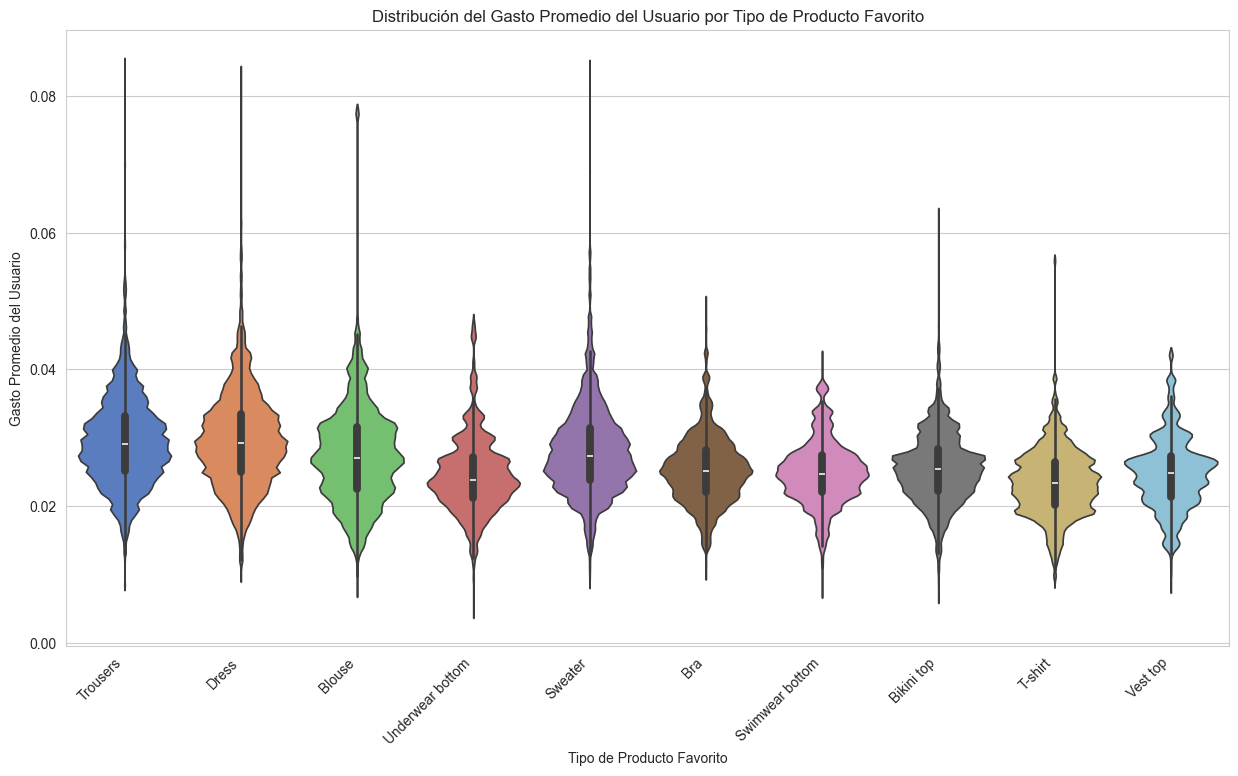

In [10]:
# --- Análisis de Gasto por Gusto ---
print("\n--- Análisis de Gasto Promedio por Tipo de Producto Favorito ---")

# Nos enfocamos en el top 10 de productos favoritos para que el gráfico sea legible
top_10_fav_products_list = df['fav_product_type'].value_counts().nlargest(10).index
df_top10 = df[df['fav_product_type'].isin(top_10_fav_products_list)]

plt.figure(figsize=(15, 8))
sns.violinplot(data=df_top10, x='fav_product_type', y='avg_price_paid', palette='muted')
plt.title('Distribución del Gasto Promedio del Usuario por Tipo de Producto Favorito')
plt.xlabel('Tipo de Producto Favorito')
plt.ylabel('Gasto Promedio del Usuario')
plt.xticks(rotation=45, ha='right')
plt.show()

¿Qué departamentos o grupos de prendas son los más populares en general?


--- Análisis de Popularidad de Departamentos de Productos ---


C:\Users\crist\AppData\Local\Temp\ipykernel_25968\3684465292.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15_departments.index, y=top_15_departments.values, palette='rocket')


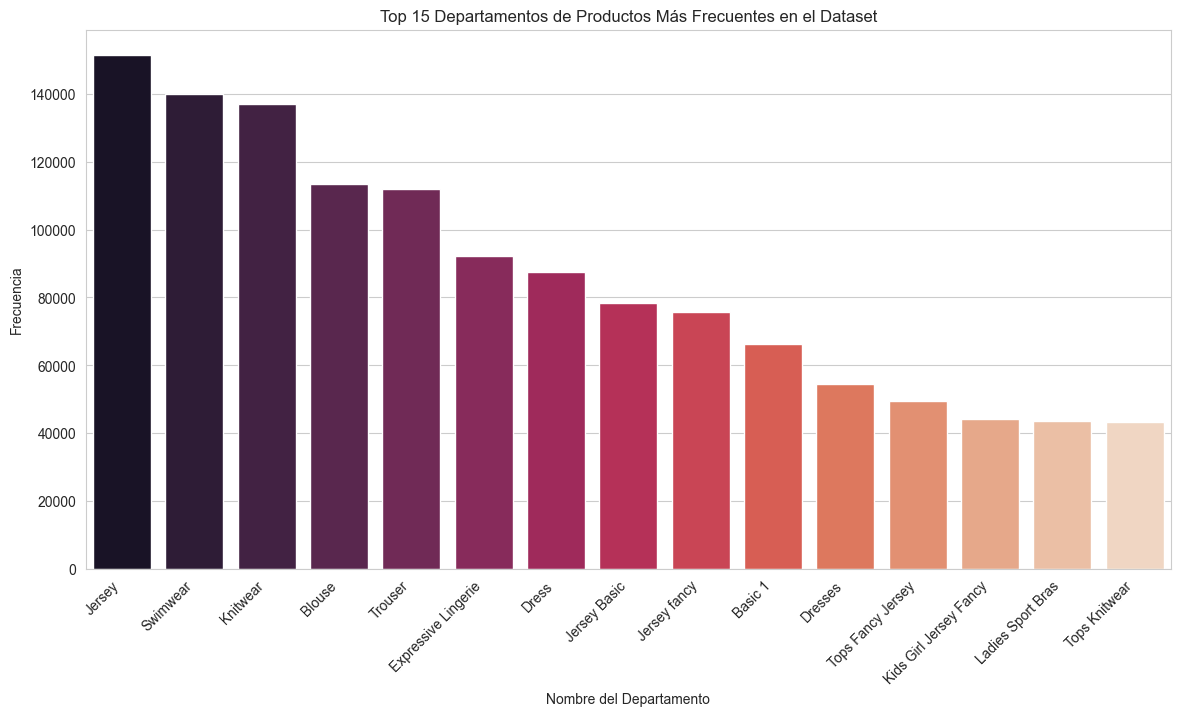

In [11]:
# --- Análisis de Popularidad de Departamentos ---
print("\n--- Análisis de Popularidad de Departamentos de Productos ---")

# Aquí usamos el 'department_name' del propio producto, no el 'favorito' del usuario
plt.figure(figsize=(14, 7))
top_15_departments = df['department_name'].value_counts().nlargest(15)
sns.barplot(x=top_15_departments.index, y=top_15_departments.values, palette='rocket')
plt.title('Top 15 Departamentos de Productos Más Frecuentes en el Dataset')
plt.xlabel('Nombre del Departamento')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()